##### Tensorflow

In [243]:
import pandas as pd
import numpy as np

In [244]:
df = pd.read_csv('wine.data', header=None)

In [245]:
df[0].value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [246]:
df.columns = list(pd.read_csv('wine_colnames.data', header=None).T.iloc[0])

In [247]:
df.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,Nonflavanoid,Proanthocyanins,ColorIntensity,Hue,OD280OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [248]:
df.columns = ['Class', 'Alc', 'Mal', 'Ash', 'Alca', 'Mag', "TotPhen", 'Flav', "NonFlav", 'Proan', 'Color', 'Hue', 'OD280OD315', 'Proline']

In [249]:
# separating features and classification
X = df.drop('Class', axis=1)
y = df.Class-1

In [250]:
# train test split
from sklearn.model_selection import train_test_split

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [252]:
import tensorflow as tf

In [253]:
# converting features into graph matrix
feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [254]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=7,num_epochs=5,shuffle=True)

In [255]:
classifier = tf.estimator.DNNClassifier(hidden_units=[500, 300], n_classes=3,feature_columns=feat_cols)

W0709 19:37:05.991057  3760 estimator.py:1811] Using temporary folder as model directory: C:\Users\magik\AppData\Local\Temp\tmpo9mo54t0


In [256]:
classifier.train(input_fn=input_func,steps=100)

In [257]:
# Define test inputs
test_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=5,shuffle=False)

In [258]:
# Evaluate accuracy
accuracy_score = classifier.evaluate(input_fn=test_input_func)['accuracy']
print("\nTest Accuracy using TensorFlow's DNNClassifier is: {0:f}%\n".format(accuracy_score*100))


Test Accuracy using TensorFlow's DNNClassifier is: 70.370370%



##### Use tensorFlow, Scikit-learn and Pybrain to conduct credit scoring classification.  Follow this tutorial Using neural networks for credit scoring: a simple example: 
https://www.r-bloggers.com/using-neural-networks-for-credit-scoring-a-simple-example/ 

##### Explain and compare the results from the 3 packages.  (If a package desnt work for you, replace it with another from the list). 

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [260]:
credit = pd.read_csv('creditset.csv')

In [261]:
# checking for null values - no null in this case
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
clientid       2000 non-null int64
income         2000 non-null float64
age            2000 non-null float64
loan           2000 non-null float64
LTI            2000 non-null float64
default10yr    2000 non-null int64
dtypes: float64(4), int64(2)
memory usage: 93.8 KB


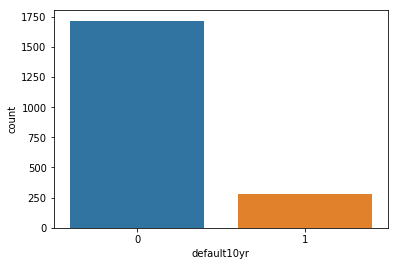

In [262]:
# checking proportion of each class - imbalanced in this case
sns.countplot(credit['default10yr'])

* *_Split into train and test first_*
* *_Then oversample minority class to balance dataset_*

In [263]:
# extracting X and y
y = credit['default10yr']
X = credit.drop('default10yr', axis=1)

In [264]:
# split train test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [265]:
data_train = pd.concat([y_train, X_train], axis=1)
data_train.head()

,default10yr,clientid,income,age,loan,LTI
1404,0,1405,28423.131471,61.671459,5282.849182,0.185864
172,0,173,26039.021490,49.390402,2056.752382,0.078987
712,1,713,47786.141064,29.708189,7181.478553,0.150284
866,0,867,35950.488450,35.471847,2664.925675,0.074128
1217,0,1218,29279.749787,18.813099,2291.988119,0.078279


In [266]:
# balancing training set with bagging
from sklearn.utils import resample

default = data_train[data_train['default10yr']==1]
no_default = data_train[data_train['default10yr']==0]

up_default = resample(default, replace=True, n_samples = len(no_default), random_state=123)
data_train_bal = pd.concat([up_default, no_default])

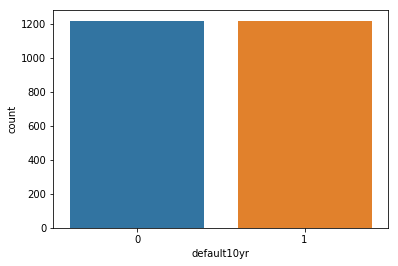

In [267]:
# confirm instances for each classes are balanced in data_train
sns.countplot(data_train_bal['default10yr'])

*__TensorFlow__*

In [268]:
y_train_bal = data_train_bal['default10yr']
X_train_bal = data_train_bal.drop('default10yr', axis=1)

In [269]:
feat_cols = []

for col in X_train_bal.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [270]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train_bal,
                                                 y=y_train_bal,
                                                 batch_size=7,
                                                 num_epochs=5,
                                                 shuffle=True)

In [271]:
classifier = tf.estimator.DNNClassifier(hidden_units=[500, 300], n_classes=2,feature_columns=feat_cols)

W0709 19:37:08.141882  3760 estimator.py:1811] Using temporary folder as model directory: C:\Users\magik\AppData\Local\Temp\tmpjb8a2teo


In [272]:
classifier.train(input_fn=input_func)

In [273]:
# Define test inputs
test_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      y=y_test,
                                                      batch_size=7,
                                                      num_epochs=5,
                                                      shuffle=False)

In [274]:
# Evaluate accuracy
accuracy_score = classifier.evaluate(input_fn=test_input_func)['accuracy']
print("\nCredit Default:\nTensorFlow DNN Classifier Prediction Accuracy: {0:f}%\n".format(accuracy_score*100))

W0709 19:37:11.837165  3760 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0709 19:37:11.852404  3760 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.



Credit Default:
TensorFlow DNN Classifier Prediction Accuracy: 87.500000%



*__Scikit_Learn__*

In [275]:
X_train_bal = data_train_bal.drop('default10yr', axis=1)
y_train_bal = data_train_bal['default10yr']

In [276]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp_clf = MLPClassifier(solver='sgd',
                        activation='logistic',
                        hidden_layer_sizes=(500, 300),
                        random_state=123,
                        tol=0.000000001)

In [277]:
mlp_clf.fit(X_train_bal, y_train_bal)
y_pred = mlp_clf.predict(X_test)

In [278]:
# accuracy testing
score = accuracy_score(y_test, y_pred)
print("\nCredit Default:\nSKlearn MLPClassifier Accuracy: {0:f}%\n".format(score*100))


Credit Default:
SKlearn MLPClassifier Accuracy: 77.166667%



*__PyBrain__*

In [279]:
from pybrain.datasets.supervised import SupervisedDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer

In [280]:
input_size = X_train_bal.shape[1]
target_size = 1
hidden_size = 100

In [281]:
ds = SupervisedDataSet(input_size, target_size)
ds.setField('input', X_train_bal.values)

y_train_bal_reshaped = y_train_bal.values.reshape(-1, 1)

ds.setField('target', y_train_bal_reshaped)

In [282]:
# init and train network
net = buildNetwork(input_size, hidden_size, target_size, bias= True )
trainer = BackpropTrainer(net,ds)

In [283]:
train_mse, validation_mse = trainer.trainUntilConvergence(
    verbose = True,
    validationProportion = 0.1,
    maxEpochs = 100,
    continueEpochs = 10)

('train-errors:', '[0.241757 , 0.135983 , 0.166696 , 0.164747 , 0.167184 , 0.167997 , 0.161427 , 0.167334 , 0.166031 , 0.165592 , 0.167135 , 0.166743 , 0.165779 , 0.165564 , 0.16522  , 0.162533 , 0.16237  , 0.163502 , 0.16716  , 0.165648 , 0.162833 , 0.166595 , 0.165356 , 0.16317  , 0.166496 , 0.162167 , 0.162174 , 0.168867 , 0.160149 , 0.163819 , 0.16331  , 0.161222 , 0.164887 , 0.164191 , 0.161047 , 0.166874 , 0.162041 , 0.165748 , 0.163385 , 0.16394  , 0.165361 , 0.159939 , 0.165022 , 0.16201  , 0.161612 , 0.16411  , 0.160742 , 0.166851 , 0.164492 , 0.167932 , 0.166799 , 0.165852 , 0.163495 , 0.166138 , 0.162738 , 0.164375 , 0.163605 , 0.164945 , 0.166457 , 0.163585 , 0.163082 , 0.164145 , 0.164831 , 0.164724 , 0.162198 , 0.163498 , 0.167249 , 0.165811 , 0.167741 , 0.160094 , 0.166033 , 0.163701 , 0.165511 , 0.162683 , 0.161532 , 0.161273 , 0.164726 , 0.165127 , 0.164242 , 0.165708 , 0.16384  , 0.163311 , 0.166705 , 0.169864 , 0.16277  , 0.164975 , 0.161047 , 0.163669 , 0.164289 , 0

In [284]:
# setting up dataset for prediction using test dataset
ds_test = SupervisedDataSet(input_size, target_size)
ds_test.setField( 'input', X_test.values )
y_test_reshaped = y_test.values.reshape(-1,1)
ds_test.setField( 'target', y_test_reshaped )

In [285]:
# prediction
pybrain_pred = net.activateOnDataset(ds_test)

In [286]:
pybrain_pred = [0 if s <0.5 else 1 for s in pybrain_pred]

In [287]:
# evaluation
score = accuracy_score(y_test, pybrain_pred)
print("\nCredit Default:\nPybrain buildNetwork Classifer Accuracy: {0:f}%\n".format(score*100))


Credit Default:
Pybrain buildNetwork Classifer Accuracy: 83.500000%



*__Observations:__*

Among TensorFlow's DNNClassifier, SKLearn's MLPClassifier, and PyBrain's buildNetwork, through multiple iterations of run, SKLearn's MLPClassifer appears to yield the most consistant accuracy, at around 77%.  However, PyBrain's buildNetwork appears to yield the highest accuracy score per every couple iterations, although the result is not consistant.